<img src="../cropped-SummerWorkshop_Header.png">  

<h1 align="center">Introduction to the Allen Brain Observatory</h1> 
<h3 align="center">August 24, 2016</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>This notebook documents some classes and functions in the AllenSDK that help manipulate files and data structures in the Allen Brain Observatory. 
</div>


In [38]:
# please make sure your drive_path is set, so that the notebook can find the data files on the hard drive

# OS X
drive_path = '/Volumes/Brain2016'

# Windows (a good guess)
# drive_path = 'e:/'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2016/'

In [2]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import sys


import matplotlib.pyplot as plt
%matplotlib notebook

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The main entry point is the `BrainObservatoryCache` class.  This class is responsible for downloading any requested data or metadata as needed and storing it in well known locations.  For this workshop, all of the data has been preloaded onto the hard drives you have received.

<p>We begin by importing the `BrainObservatoryCache` class and instantiating it.

<p>`manifest_path` is a path to the manifest file.  We will use the manifest file preloaded onto your Workshop hard drives.  Make sure that `drive_path` is set correctly for your platform.  (See the first cell in this notebook.)
</div>


In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_path = os.path.join(drive_path,'BrainObservatory/manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.1:**  Get information about what's in the dataset from BrainObservatoryCache

<p>The following methods for BrainObservatoryCache retrieve the available depths, cre lines, areas, and stimuli.  Notice that these parameters outline the 'data cube'.
</div>

In [4]:
# Download a list of all targeted areas
targeted_structures = boc.get_all_targeted_structures()
print 'all targeted structures: ' + str(targeted_structures)

# Download a list of all imaging depths
depths = boc.get_all_imaging_depths()
print 'all imaging depths: ' + str(depths)

# Download a list of all cre driver lines 
cre_lines = boc.get_all_cre_lines()
print 'all cre lines: ' + str(cre_lines)

# Download a list of all stimuli
stims = boc.get_all_stimuli()
print 'all stimuli: ' + str(stims)


all targeted structures: [u'VISal', u'VISl', u'VISp', u'VISpm']
all imaging depths: [175, 275, 350, 375]
all cre lines: [u'Cux2-CreERT2', u'Rbp4-Cre', u'Rorb-IRES2-Cre', u'Scnn1a-Tg3-Cre']
all stimuli: ['drifting_gratings', 'locally_sparse_noise', 'natural_movie_one', 'natural_movie_three', 'natural_movie_two', 'natural_scenes', 'spontaneous', 'static_gratings']


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.2:**  Use tab completion in Jupyter to see what other methods the BrainObservatoryCache has.
</div>

In [ ]:
# Hit the 'tab' key with the cursor just after the '.'
boc.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Experiment containers</h2>
<p>The experiment container describes a set of 3 experiment sessions performed at the same location (targeted area and imaging depth) in the same mouse that targets the same set of cells. Each experiment container has a unique ID number.
</div>

In [5]:
expt_cont_list = boc.get_experiment_containers()

print "There are " + str(len(expt_cont_list)) + " experiment containers."

There are 79 experiment containers.


In [6]:
# example experiment_container_ids to use in this notebook
expt_list = [511510699, 511510699, 511510695, 511510664, 511510699, 
            511510797, 511507650, 511510945, 511510917, 511510945, 
            511510945, 511510945, 511510742, 511510742, 511510742, 
            511510742, 511510742, 511510635, 511510635, 511510635, 
            511510635, 511510675, 511510675, 511498742, 511510911, 
            511510658, 511498500, 511510658, 511510658, 511510658, 
            511510860, 511510860]

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.3:** Pick an experiment container.  For this session we're going to need to get an experiment, which you'll use for the remainder of the tutorial.  Execute the following cells to do this.
</div>

In [7]:
# pick a random experiment container
expt_index = np.random.randint(0,len(expt_list))
# get expt_container_id for that index
expt_container_id = expt_list[expt_index]

print "YOU GET AN EXPERIMENT CONTAINER!! EVERYONE GETS AN EXPERIMENT CONTAINER!!!"
print 'expt_container_id =',expt_container_id

YOU GET AN EXPERIMENT CONTAINER!! EVERYONE GETS AN EXPERIMENT CONTAINER!!!
expt_container_id = 511510797


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.3.1:** Find out the location and Cre line of this experiment container
</div>

In [8]:
print "Experiment container " + str(expt_container_id) + " is "
print boc.get_experiment_containers(ids=[expt_container_id])

Experiment container 511510797 is 
[{'targeted_structure': u'VISal', 'imaging_depth': 175, 'age_days': 132.0, 'id': 511510797, 'cre_line': u'Cux2-CreERT2'}]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.4:** Get information about all of the experiment <strong>sessions</strong> in your experiment <strong>container</strong>.  This is accomplished with the `get_ophys_experiments` method.  
</div>

In [9]:
expt_session_info = boc.get_ophys_experiments(experiment_container_ids=[expt_container_id])
print(expt_session_info)

[{'session_type': u'three_session_A', 'age_days': 132.0, 'imaging_depth': 175, 'experiment_container_id': 511510797, 'targeted_structure': u'VISal', 'cre_line': u'Cux2-CreERT2', 'id': 501933264}, {'session_type': u'three_session_C', 'age_days': 132.0, 'imaging_depth': 175, 'experiment_container_id': 511510797, 'targeted_structure': u'VISal', 'cre_line': u'Cux2-CreERT2', 'id': 501847516}, {'session_type': u'three_session_B', 'age_days': 132.0, 'imaging_depth': 175, 'experiment_container_id': 511510797, 'targeted_structure': u'VISal', 'cre_line': u'Cux2-CreERT2', 'id': 501889084}]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>`get_experiment_containers` returns a list of dictionaries that contain information about experiment containers.

<p>`get_ophys_experiments` returns a list of dictionaries that contain information about experiment sessions.  Here we are using keyword arguments to return just those experiment sessions that belong to our experiment container.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.5:**  Turn it into a DataFrame for easy access
</div>

In [10]:
expt_session_frame = pd.DataFrame(expt_session_info)
expt_session_frame

,age_days,cre_line,experiment_container_id,id,imaging_depth,session_type,targeted_structure
0,132,Cux2-CreERT2,511510797,501933264,175,three_session_A,VISal
1,132,Cux2-CreERT2,511510797,501847516,175,three_session_C,VISal
2,132,Cux2-CreERT2,511510797,501889084,175,three_session_B,VISal


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.1:**  Find all experiment sessions from a given area, depth, cre line, or specific stimulus. How many of each are there? (Hint:  use the `help` function to see the other optional arguments for `get_ophys_experiments` or `get_experiment_containers`.)
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.2:**  Make a pandas table from all experiment sessions.  Perform Exercise 1.1 using this table.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.3:**  Find the experiment id for Session A from your experiment container selected above.  Save this as `session_id`.
</div>

In [12]:
session_id = expt_session_frame[expt_session_frame.session_type=='three_session_A'].id.values[0]
print session_id

501933264


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Cell Specimens</h2>


<p>`get_cell_specimens` is a method of the BrainObservatoryCache that provides important pre-computed characteristics of all the cells in the data set.  
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.5:**  Make a pandas table from the information returned by `get_cell_specimens` for the cells in your experiment container. How many cells are in this container?
</div>

In [13]:
cell_specimens_df = pd.DataFrame(boc.get_cell_specimens(experiment_container_ids=[expt_container_id]))
cell_specimens_df.head()

,area,cell_specimen_id,dsi_dg,experiment_container_id,imaging_depth,osi_dg,osi_sg,p_dg,p_ns,p_sg,...,pref_sf_sg,pref_tf_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
0,VISal,517482550,0.271337,511510797,175,0.530524,NaN,0.012081,NaN,NaN,...,NaN,2,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
1,VISal,517482554,NaN,511510797,175,NaN,1.037934,NaN,2.180220e-18,5.357905e-23,...,0.02,NaN,0.26608,0.29934,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
2,VISal,517482558,NaN,511510797,175,NaN,0.891907,NaN,1.804204e-03,1.443518e-03,...,0.02,NaN,0.29934,0.79824,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3,VISal,517482562,NaN,511510797,175,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
4,VISal,517482566,NaN,511510797,175,NaN,0.442245,NaN,1.822134e-27,5.463160e-43,...,0.02,NaN,0.26608,0.19956,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


In [14]:
print len(cell_specimens_df)

302


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.4:**  Filter the table from the previous task to find all cells in your experiment container id that have `dsi_dg` (Direction Selectivity Index for Drifting Gratings) < 1.0.
</div>

In [15]:
cell_specimens_df[cell_specimens_df.dsi_dg < 1.0]

,area,cell_specimen_id,dsi_dg,experiment_container_id,imaging_depth,osi_dg,osi_sg,p_dg,p_ns,p_sg,...,pref_sf_sg,pref_tf_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
0,VISal,517482550,0.271337,511510797,175,0.530524,NaN,1.208055e-02,NaN,NaN,...,NaN,2,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
5,VISal,517482578,0.768780,511510797,175,1.011351,NaN,1.204499e-05,NaN,NaN,...,NaN,8,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
7,VISal,517482586,0.880965,511510797,175,1.169438,NaN,4.113210e-15,NaN,NaN,...,NaN,2,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
8,VISal,517482593,0.508744,511510797,175,0.993419,NaN,3.247236e-98,NaN,NaN,...,NaN,8,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
11,VISal,517482617,0.272378,511510797,175,0.553613,0.465667,9.047064e-09,2.530450e-08,5.775943e-18,...,0.02,1,0.16630,0.26608,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
12,VISal,517482622,0.487389,511510797,175,1.163801,NaN,1.544176e-10,NaN,NaN,...,NaN,2,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
13,VISal,517482627,0.204669,511510797,175,1.224232,1.212036,3.378292e-15,9.738911e-261,1.494189e-09,...,0.08,1,0.29934,0.16630,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
15,VISal,517482637,0.429586,511510797,175,0.758564,0.568753,2.518804e-05,4.761795e-06,1.128216e-12,...,0.04,2,0.36586,0.16630,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
16,VISal,517482644,0.953972,511510797,175,0.366210,0.763313,1.171328e-05,1.864002e-03,6.968107e-08,...,0.02,1,0.16630,0.19956,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
17,VISal,517482649,0.357625,511510797,175,0.884641,NaN,1.767347e-01,NaN,NaN,...,NaN,4,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.5:**  Find the cell in your filtered dataframe that has the largest `dsi_dg` that is less than 1.0.  Save the cell_specimen_id of this cell to a variable called `cell_specimen_id`.
</div>

In [16]:
cell_specimens_filtered_dg = cell_specimens_df[cell_specimens_df.dsi_dg < 1.0]

In [17]:
max_dsi = cell_specimens_filtered_dg.dsi_dg.max()
cell_specimen_id = cell_specimens_filtered_dg[cell_specimens_filtered_dg.dsi_dg==max_dsi].cell_specimen_id.values[0]
print cell_specimen_id, max_dsi

517487169 0.991074423479


In [69]:
cell_specimens_filtered_dg = cell_specimens_df[cell_specimens_df.dsi_dg < 1.0]

row_index = cell_specimens_filtered_dg.dsi_dg.argmax()

cell_specimen_id = cell_specimens_filtered_dg['cell_specimen_id'].loc[row_index]
max_dsi = cell_specimens_filtered_dg.dsi_dg.max()

print cell_specimen_id, max_dsi

517516092 0.998964356167


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.6:**  Find the preferred direction and temporal frequency for the cell you have identified in `cell_id`.  Save these to `ori` and `tf`.
</div>

In [18]:
ori = cell_specimens_filtered_dg[cell_specimens_filtered_dg.cell_specimen_id==cell_specimen_id].pref_dir_dg.values[0]
tf = cell_specimens_filtered_dg[cell_specimens_filtered_dg.cell_specimen_id==cell_specimen_id].pref_tf_dg.values[0]
print ori
print tf

0.0
2.0


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>We will be using the cell you have recorded in `cell_specimen_id` for much of the remainder of this notebook.

<h2>The Data Object</h2>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 2.1:**  Create a data_set object for this experiment session.

The data_set object contains methods and info for a single experiment session (one of the 3 in the experiment container)
</div>

In [19]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id = session_id)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 2.2:** Use either `dir` or tab-completion to find out what methods the new `data_set` object has.
</div>

In [ ]:
data_set.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Using the methods you find, perform the following exercises.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.1:** Get the metadata for your data set. How old was the mouse in this experiment?  Was it male or female?  
</div>

In [20]:
data_set.get_metadata()

{'age_days': 91,
 'cre_line': 'Cux2-CreERT2',
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.2',
 'excitation_lambda': '910 microns',
 'experiment_container_id': 511510797,
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Cux2-CreERT2; Camk2a-tTA; Ai93(TITL-GCaMP6f)',
 'imaging_depth_um': 175,
 'indicator': 'GCaMP6f',
 'ophys_experiment_id': 501933264,
 'session_start_time': datetime.datetime(2016, 2, 11, 12, 13, 34),
 'session_type': 'three_session_A',
 'sex': 'male',
 'targeted_structure': 'VISal'}

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.3:** Get the max projection image for your data set.  
</div>

<IPython.core.display.Javascript object>


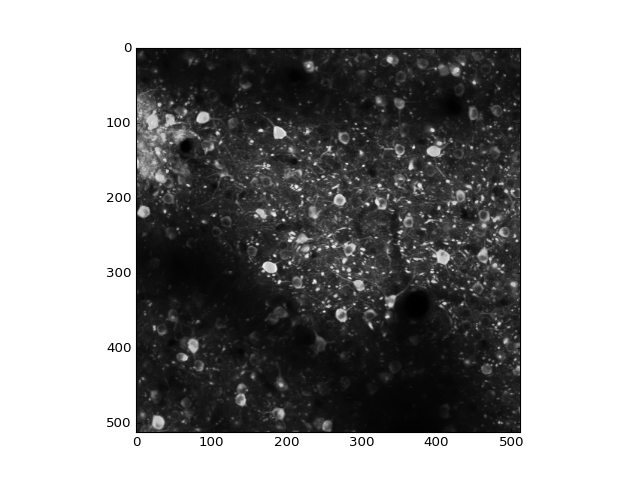

In [21]:
max_proj = data_set.get_max_projection()
plt.imshow(max_proj, cmap='gray')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.4:** Let's find the cell you recorded in `cell_specimen_id` in `data_set`.  `cell_specimen_id` is a unique cell identifier that is used across multiple sessions in which that cell appears.  For each individual session, each cell has an index specific to that session.  There are two methods of data_set that allow you to map back and forth between these two identifiers.  Find them and use one of them to save the session identifier for your cell to `cell_index`.
</div>

In [23]:
cell_index = data_set.get_cell_specimen_indices([cell_specimen_id])[0]
print cell_index

9


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.5:** Get the roi mask for your cell.  (Hint:  There are two methods that return roi masks.  In one of them masks are returned as lists of python objects.  What methods do they have?  What is the type of this object?)  What is the size and shape of the mask?
</div>

In [24]:
# solution using arrays
roi_array = data_set.get_roi_mask_array()
roi_mask = roi_array[cell_index,:,:]

In [25]:
print roi_array.shape
print max_proj.shape
print roi_mask.shape

(214, 512, 512)
(512, 512)
(512, 512)


In [37]:
# solution using roi_mask objects
cell_mask = data_set.get_roi_mask(cell_specimen_ids=[cell_specimen_id])[0]

print type(cell_mask)
print(dir(cell_mask))


roi_mask = cell_mask.get_mask_plane()
print roi_mask.shape

<class 'allensdk.brain_observatory.roi_masks.RoiMask'>
['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'get_mask_plane', 'height', 'img_cols', 'img_rows', 'init_by_mask', 'init_by_pixels', 'label', 'mask', 'mask_group', 'valid', 'width', 'x', 'y']
(512, 512)


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.6:** Plot the mask overlayed on the max projection.  (Hint:  imshow has an optional parameter called `alpha`.)
</div>

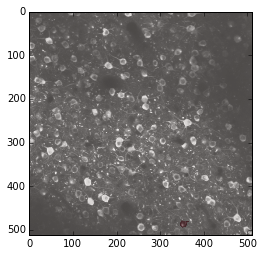

In [77]:
plt.imshow(max_proj, cmap='gray')
plt.imshow(roi_array[cell_index,:,:], cmap='Reds', alpha=0.3)

# Traces

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.7:**  What kinds of traces can you extract from the data object?  Retrieve the "corrected fluorescence" traces.   What is the shape of this object?  The methods will return a tuple of length two.  The first value is the set of time stamps for the acquisition frames; the second is an array of shape (number_of_cells,time_points).  How many cells are in your data set?  Plot the "corrected fluorescence" trace for the cell you saved in `cell_session_id`. 
</div>

In [80]:
timestamps, traces = data_set.get_corrected_fluorescence_traces()

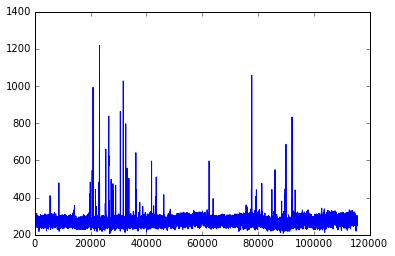

In [81]:
plt.plot(traces[cell_index,:])

# Stimuli

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.1:**  What stimuli were shown in this session? Use a method of the data_set object to find out.
</div>

In [82]:
data_set.list_stimuli()

[u'drifting_gratings',
 u'natural_movie_one',
 u'natural_movie_three',
 u'spontaneous']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The stimulus table stores the timing information regarding stimulus conditions
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.2:** Use a method of the data_set object to get the stimulus_table for drifting gratings.  (Use help to find the necessary arguments for the method.)  What kind of object is this?  How many stimulus conditions are there?  How many orientations?  How many temporal frequencies?  How many trials of each condition were shown?  How long was each presentation?  (Hint:  use boolean indexing.)

<p><strong>Important hint</strong>: trial start and end times are in aquisition frames, which count each frame acquired by the two-photon microscope, not seconds.  This is the same index used for the fluorescence traces.
</div>

In [83]:
stim_table = data_set.get_stimulus_table('drifting_gratings')

In [84]:
stim_table.keys()

Index([u'temporal_frequency', u'orientation', u'blank_sweep', u'start', u'end'], dtype='object')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.3:**> Plot the fluorescence trace for the cell in `cell_session_id` for a few trials using the start, end times of the trials.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.4:** Create a plot that shows when the drifting gratings were displayed.  (Hint:  avxspan is an axis object method that will fill in the background between two x positions.  See the following example.)
</div>

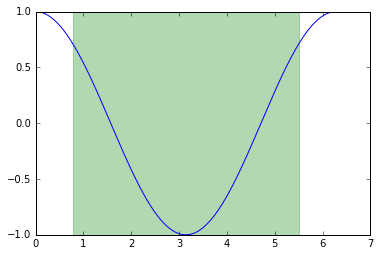

In [26]:
fig,ax = plt.subplots(1)

t = np.linspace(0,2.0*np.pi,1000)
ax.plot(t,np.cos(t))
ax.axvspan(xmin=np.pi/4,xmax=7*np.pi/4,color='g',alpha=0.3)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Analysis</h2>


<p>The analysis objects summarize this trial data and provide convenient DataFrame objects.  
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 3.1:**  Import the `DriftingGratings` object and instatiate it with `data_set`.
</div>

In [85]:
from allensdk.brain_observatory.drifting_gratings import DriftingGratings

dg = DriftingGratings(data_set)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>sweep_response is a DataFrame that contains the dF/F response of each cell during each stimulus trial. It shares its index with stim_table. Each cell contains a timeseries that extends from 1 second prior to the start of the trial to 1 second after the end of the trial. The sweep_response table is organized as cells (columns) for each sweep (rows)

<p>mean_sweep_response provides the mean dF/F for each trial.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.5:** Get the sweep_response for this stimulus and data set.  What type of object is this?  What data does it contain?
</div>

In [86]:
sweep_response = dg.sweep_response

In [91]:
len(sweep_response)

628

In [92]:
len(stim_table)

628

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.6:** Get the mean_sweep_response for this stimulus and data set.  How does this object differ from sweep_response?
</div>

In [87]:
mean_sweep_response = dg.mean_sweep_response

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.7:** Find the trials for a specific stimulus condition
(ex: temporal_frequency = 2 and orientation = 90).  Use the stimulus table and boolean indexing.
</div>

In [97]:
subset = sweep_response[(stim_table.orientation==ori)&(stim_table.temporal_frequency==tf)]

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.8:** Use the trials you've found and the sweep_response table to plot the response across trials.  (Extra credit for highlighting the interval over which the stimulus is 'on'.)
</div>

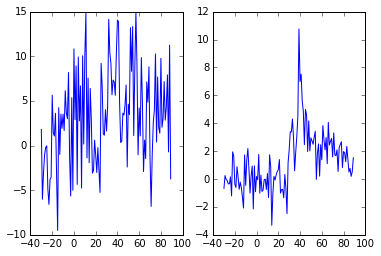

In [109]:
timex = np.arange(-1*dg.interlength, dg.sweeplength+dg.interlength)
plt.subplot(121)
plt.plot(timex, subset[str(cell_index)].iloc[5])
plt.subplot(122)
plt.plot(timex, subset[str(cell_index)].mean())

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.9:**  Compute and plot the mean response over trials for the preferred condition for your selected cell.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.10:**  Repeat this process using `mean_sweep_response` in order to compute a single numerical value for the response to the preferred orientation and temporal frequency.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.11:**  Generate a matrix of response values over all orientation and temporal frequency conditions by repeating the previous calculation for each condition.  Plot a heat map of the mean response across all stimulus conditions.  Plot orienation and temporal frequency tuning curves by averaging over each.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 3.2:**  The easy way!  We did this as a pedagogic exercise so that you could learn about the sdk and the data.  Should you need it, this matrix has been computed already and is available in the `response` attribute for `DriftingGratings`.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Other Stimulus Types</h2>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 3.2:**  There are analysis objects for the other stimulus types.  You saw above that Session A contains responses for drifting gratings, natural movies, and spontaneous activity.  Instantiate the Natural Movie object and see what methods and attributes are available.
</div>

In [ ]:
from allensdk.brain_observatory.natural_movie import NaturalMovie 

nm1 = NaturalMovie(data_set)  #how to pick which movie, check sdk

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.12:**  There are also objects for StaticGratings, NaturalScenes, and LocallySparseNoise.  For each of these, use what you've learned to find an experiment with each of these stimulus types, instantiate the analysis object, and explore the stimulus tables and available attributes.
</div>

In [ ]:
from allensdk.brain_observatory.static_gratings import StaticGratings
from allensdk.brain_observatory.natural_scenes import NaturalScenes
from allensdk.brain_observatory.locally_sparse_noise import LocallySparseNoise

### Other Exercises or Homework

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Homework 1:**  Compute Receptive Fields using the Locally Sparse Noise stimulus.  (If you're having trouble, try testing your code on this cell_specimen_id:   )
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Project Ideas</h2>

<p>Here are some ideas to get you started in thinking about your projects.
</div>

<ol>
<li> How do cells' responses differ across regions, layers, and Cre lines?  How best can these differences be captured?
<li> What is the distribution of feature responses?  How does preferred orientation, say, vary across regions, layers, and Cre lines?
<li> Do the responses to one type of stimulus allow us to predict the responses to a different type?  Are grating responses consistent with natural image responses?
<li> Can you distinguish "simple" and "complex" cells in the dataset?  What is the right model or metric to use?
<li> Characterize the cross correlations (both "noise" and "signal" correlations) in the data set.  Can you model this variability?  
<li> Develop models of stimulus response that control for running speed or include temporal dynamics.
<li> How well can you identify the stimulus category given the activity of a set of neurons within an experiment, i.e. can you "decode" the stimulus?  What is the best way to do this?  What features are necessary?  Can you identify cells that carry "more" information about stimuli?
<li> What population metrics are useful for describing the data?  Can you model the population activity?
<li> What is the best way to visualize the activity of many cells in an experiment?  Is there a useful dimensional reduction that can help you?
</ol>